# Seattle Crime Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from IPython.display import HTML, display
plt.style.use('seaborn')
# import warnings
# warnings.filterwarnings("ignore")

# Seattle Data

According to the US Bureau of Labor and Statistics (BLS), Seattle's population was estimated to be 669,641 on July 1, 2014 (around the time of this crime data). Using their crime data taken from the assignment, I converted some of the crime categories to better match San Francisco's data. For a list of conversions, see the end of this post.

### Crime Rate

Let's see their annualized crime rate (crimes reports per 100 people) for each month.

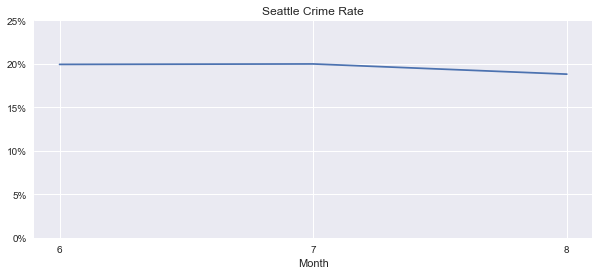

In [2]:
crime_conv = pd.read_csv('crime_conversion.csv')
seattle_conv = crime_conv[['SEATTLE OLD', 'SEATTLE NEW']].set_index('SEATTLE OLD').squeeze().to_dict()
seattle_df = pd.read_csv('seattle_incidents_summer_2014.csv',
                         converters={'Date Reported': pd.to_datetime,
                                     'Occurred Date or Date Range Start': pd.to_datetime,
                                     'Occurred Date Range End': pd.to_datetime})
seattle_df['Offense'] = seattle_df['Summarized Offense Description'].map(seattle_conv)
seattle_summary = seattle_df.pivot_table(values='RMS CDW ID',
                                         aggfunc='count',
                                         columns=['Month'],
                                         index='Offense',
                                         margins=True,
                                         margins_name='Total')

seattle_pop = 669641

seattle_month_summary = (seattle_summary.loc['Total', [6, 7, 8]] * 12 / seattle_pop * 100)
ax = seattle_month_summary.plot(title='Seattle Crime Rate', ylim=(0, 25), xticks=[6,7,8], figsize=(10,4), grid=True)
y_format = mpl.ticker.PercentFormatter(xmax=100, decimals=0, symbol='%', is_latex=False)
_ = ax.yaxis.set_major_formatter(y_format)

### Seattle Crime Rate Breakdown

Now let's look at some major types of crimes and their respective annualized rates.

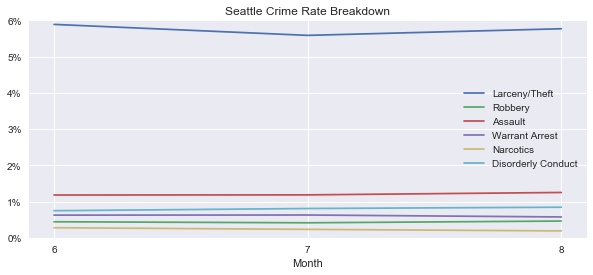

In [3]:
ax = (seattle_summary.loc['Larceny/Theft', [6, 7, 8]] * 12 / seattle_pop * 100)\
     .plot(title='Seattle Crime Rate Breakdown', ylim=(0, 6), xticks=[6,7,8], #yticks=[0,1,2,3],
           figsize=(10,4), grid=True, label='Larceny/Theft', legend=True)
ax = (seattle_summary.loc['Robbery', [6, 7, 8]] * 12 / seattle_pop * 100)\
     .plot(ax=ax, label="Robbery", legend=True)
ax = (seattle_summary.loc['Assault', [6, 7, 8]] * 12 / seattle_pop * 100)\
     .plot(ax=ax, label="Assault", legend=True)
ax = (seattle_summary.loc['Warrant Arrest', [6, 7, 8]] * 12 / seattle_pop * 100)\
     .plot(ax=ax, label="Warrant Arrest", legend=True)
ax = (seattle_summary.loc['Narcotics', [6, 7, 8]] * 12 / seattle_pop * 100)\
     .plot(ax=ax, label="Narcotics", legend=True)
ax = (seattle_summary.loc['Disorderly Conduct', [6, 7, 8]] * 12 / seattle_pop * 100)\
     .plot(ax=ax, label="Disorderly Conduct", legend=True)
y_format = mpl.ticker.PercentFormatter(xmax=100, decimals=0, symbol='%', is_latex=False)
_ = ax.yaxis.set_major_formatter(y_format)

### San Francisco Data

Now looking at San Francisco, the population was estimated to be 853,258 on July 1, 2014 (according to the BLS). Again, for a list of crime classification conversions, see the end of this post.

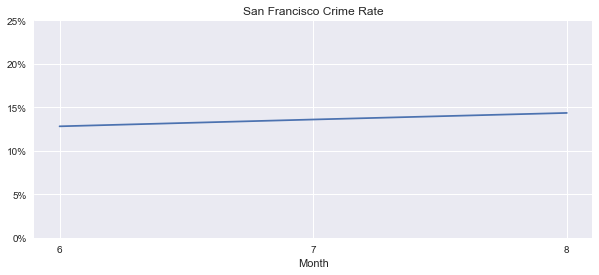

In [4]:
sf_conv = crime_conv[['SF OLD', 'SF NEW']].set_index('SF OLD').squeeze().to_dict()
sf_df = pd.read_csv('sanfrancisco_incidents_summer_2014.csv', parse_dates=['Date'])
sf_df['Offense'] = sf_df['Category'].map(sf_conv)
sf_df['Month'] = sf_df['Date'].apply(lambda x: x.month)
sf_summary = sf_df.pivot_table(values='IncidntNum',
                               aggfunc='count',
                               columns=['Month'],
                               index='Offense',
                               margins=True,
                               margins_name='Total')

sf_pop = 853258

sf_month_summary = (sf_summary.loc['Total', [6, 7, 8]] * 12 / sf_pop * 100)
ax = sf_month_summary.plot(title='San Francisco Crime Rate', ylim=(0, 25), xticks=[6,7,8], figsize=(10,4), grid=True)
y_format = mpl.ticker.PercentFormatter(xmax=100, decimals=0, symbol='%', is_latex=False)
_ = ax.yaxis.set_major_formatter(y_format)

### San Francisco Crime Rate Breakdown

Let's take a similar look at some of San Francisco's major crime rates.

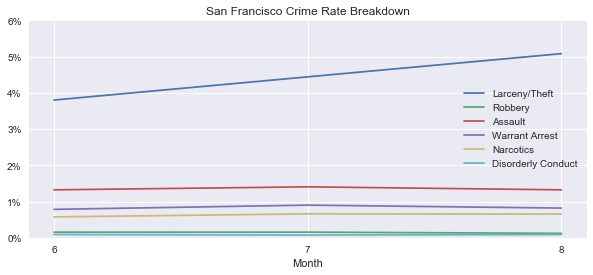

In [5]:
ax = (sf_summary.loc['Larceny/Theft', [6, 7, 8]] * 12 / sf_pop * 100)\
     .plot(title='San Francisco Crime Rate Breakdown', ylim=(0, 6), xticks=[6,7,8], #yticks=[0,1,2,3],
           figsize=(10,4), grid=True, label='Larceny/Theft', legend=True)
ax = (sf_summary.loc['Robbery', [6, 7, 8]] * 12 / sf_pop * 100)\
     .plot(ax=ax, label="Robbery", legend=True)
ax = (sf_summary.loc['Assault', [6, 7, 8]] * 12 / sf_pop * 100)\
     .plot(ax=ax, label="Assault", legend=True)
ax = (sf_summary.loc['Warrant Arrest', [6, 7, 8]] * 12 / sf_pop * 100)\
     .plot(ax=ax, label="Warrant Arrest", legend=True)
ax = (sf_summary.loc['Narcotics', [6, 7, 8]] * 12 / sf_pop * 100)\
     .plot(ax=ax, label="Narcotics", legend=True)
ax = (sf_summary.loc['Disorderly Conduct', [6, 7, 8]] * 12 / sf_pop * 100)\
     .plot(ax=ax, label="Disorderly Conduct", legend=True)
y_format = mpl.ticker.PercentFormatter(xmax=100, decimals=0, symbol='%', is_latex=False)
_ = ax.yaxis.set_major_formatter(y_format)

# Comparison

With just a quick eyeball comparison, it appears that Seattle had more crime overall and many categories. On the other hand, this may be misleading since there might be a difference in reporting crimes and/or different size police force (under the assumption that you catch more crimes than with a smaller police force). Larceny/Theft and Assault seem to be the most frequent crimes. Since month doesn't seem to be very helpful, let's view the overall annualized rates side by side.

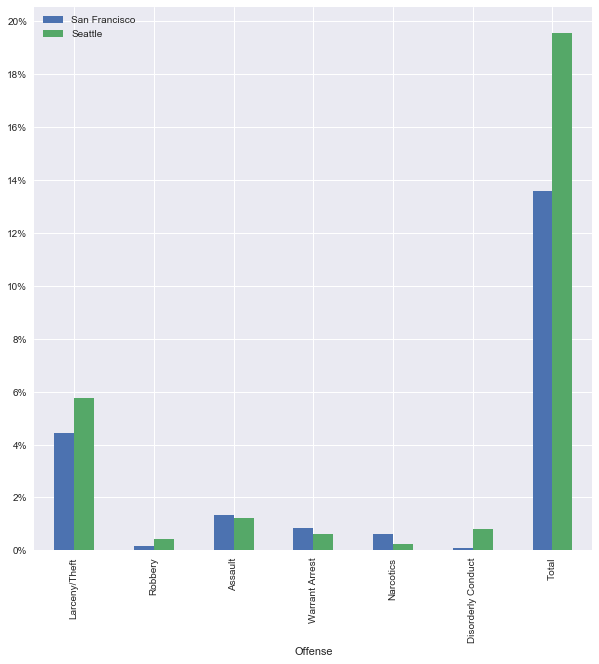

In [6]:
sf_totals = sf_summary.loc[['Larceny/Theft', 'Robbery', 'Assault', 'Warrant Arrest',
                            'Narcotics', 'Disorderly Conduct', 'Total'], 'Total'] / 3 * 12 / sf_pop * 100
seattle_totals = seattle_summary.loc[['Larceny/Theft', 'Robbery', 'Assault', 'Warrant Arrest',
                            'Narcotics', 'Disorderly Conduct', 'Total'], 'Total'] / 3 * 12 / seattle_pop * 100
combined_totals = pd.concat([pd.DataFrame(sf_totals.rename('San Francisco')),
                             pd.DataFrame(seattle_totals.rename('Seattle'))], 1, sort=False)
ax = combined_totals.plot.bar(figsize=(10, 10), yticks=[0,2,4,6,8,10,12,14,16,18,20])
y_format = mpl.ticker.PercentFormatter(xmax=100, decimals=0, symbol='%', is_latex=False)
_ = ax.yaxis.set_major_formatter(y_format)

# Conclusion

With just these 2 datasets, it appears that in 2014, Seattle had significantly more crime per capita than San Francisco (by over 5%). One area in which this is most significant is in the rate of Larceny/Theft, in which Larceny/Theft is higher by at least a percentage point, along with the Disorderly Conduct rate. One the other hand, it appears that rates for Assaults, Warrant Arrests, and Narcotics are slightly higher in San Francisco.

Unfortunately, this is only a surface level comparison between the 2 cities. There could be a multitude of reasons why it appears that Seattle has more crime than San Francisco, including the size of the police force relative to the size of the population, differences in culture between the two police departments, differences in recording crimes, and differences in criminal statutes. More in depth analysis is necessary to get a more precise view on whether or not the crime rate is actually higher in Seattle.

### Notes

The following is the list of crime conversions that were used to combine Seattle and San Francisco data. In general, I tried to generalized the crimes, especially from Seattle. For example, Car Prowl is a type of Theft, so I categorized it as Larceny/Theft. If the crime labels were very specific, I labelled them as "Other Offenses" or "Non-Criminal" depending on whether it appeared to be crimes or not. The most surprising thing that I found was that there was no "Homicide" category in San Francisco categories (although there was a "Suicide" category in San Francisco). This seemed strange to me and I was not able to resolve this problem.

In [7]:
display(crime_conv.replace(np.nan, ''))

,SEATTLE OLD,SEATTLE NEW,SF OLD,SF NEW
0,CAR PROWL,Larceny/Theft,LARCENY/THEFT,Larceny/Theft
1,OTHER PROPERTY,Other Offenses,OTHER OFFENSES,Other Offenses
2,BURGLARY,Burglary,NON-CRIMINAL,Non-Criminal
3,VEHICLE THEFT,Vehicle Theft,ASSAULT,Assault
4,PROPERTY DAMAGE,Vandalism,VEHICLE THEFT,Vehicle Theft
5,ASSAULT,Assault,WARRANTS,Warrant Arrest
6,FRAUD,Fraud,DRUG/NARCOTIC,Narcotics
7,DISTURBANCE,Disorderly Conduct,SUSPICIOUS OCC,Non-Criminal
8,THREATS,Other Offenses,MISSING PERSON,Missing Person
9,STOLEN PROPERTY,Larceny/Theft,SECONDARY CODES,Other Offenses
